In [2]:
from PartialCointegration import *
from PCISimulation import *
from ResultReplication import *
import warnings

warnings.filterwarnings('ignore')

# Generating Data
To generate simulated partially cointegrated pairs, we first must define the parameters of the model, the sample size(s), and the number of simulations. Let's start with an easy example:

In [5]:
params = [0, 1, 0.9, None, 1, 0.0236] # [alpha, beta, rho, sigma_m, sigma_r, sigma_x]
var_param = [0.5, 1, 1.5]
sample_sizes = [100, 1000]
nb_sims = 10

data = f_generate_data(params, var_param, sample_sizes, nb_sims)


The None value in our "params" list specifies which model parameter we want to vary ("sigma_m" in this case). This will come in handy when replicating Matthew Clegg's results. The code above will generate 3 x 10 = 30 (10 simulation for every value in "var_param") pairs of partially cointegrated time-series of length n = 1,000, and store them in an "xarray.Dataset".

As mentionned, "data" is an xarray object; a labeled, multidimensional array for handling gridded data in Python. We can access individual "data variables" in the following manner:

In [6]:
X1 = data["X1"]
print(X1)

<xarray.DataArray 'X1' (var_param: 3, simulation: 10, time: 1000)> Size: 240kB
array([[[101.72016565,  98.02419789, 101.6040427 , ..., 133.80183147,
         127.46749782, 124.61675023],
        [ 96.1186869 ,  99.92972909, 101.46496277, ..., 148.39167717,
         147.82600464, 148.42843856],
        [102.71509266, 101.80718518, 100.19506179, ...,  65.52400473,
          65.8340462 ,  66.52535734],
        ...,
        [101.30484866, 102.06476104, 100.84000494, ...,  40.48480567,
          38.69263888,  39.20662838],
        [ 99.39705712,  97.68629945,  96.18140811, ...,  78.66628593,
          75.7246604 ,  74.94571686],
        [103.56783034, 102.49999812, 102.70034518, ..., 114.12151859,
         110.73963643, 113.86308704]],

       [[100.26139446,  97.65271891,  98.38792464, ...,  46.64361139,
          47.31631933,  48.06513666],
        [102.1730927 , 103.34841483, 104.0790666 , ...,  79.22767945,
          79.90081681,  79.32072424],
        [101.44362909,  97.92187089, 100.7


After accessing X1 from the dataset, you get an xarray.DataArray representing the variable X1 across different parameter values (var_param), simulation runs (simulation), and time steps (time). Let's say I want to access the 2nd simulation of the X1 time-series generated with a "sigma_m" value of 1.0. This can be done easily with the ".sel()" method:

In [7]:
ts = X1.sel(simulation = 1, var_param = 1.0)
print(ts)

<xarray.DataArray 'X1' (time: 1000)> Size: 8kB
array([102.1730927 , 103.34841483, 104.0790666 , 101.1288194 ,
       105.03395412, 104.10302385, 106.38696544, 108.26410866,
       109.14896722, 102.29183462, 100.90558065, 100.31760041,
       103.43640992, 106.25507536, 106.74036646, 107.51684194,
       108.02131471, 106.70104074, 106.27971122, 107.41197542,
       103.10322004, 105.18139724, 109.89640663, 110.79584448,
       112.9132051 , 108.73780577, 109.46364107, 107.73986902,
       105.62909987, 106.89580392, 105.55122442, 107.58145363,
       107.14121217, 114.08376354, 113.55521939, 113.07408688,
       108.70074995, 106.28796506, 103.14908574,  98.00996374,
       103.78974823, 110.42711266, 111.15536999, 110.90912817,
       108.67427222, 112.95175454, 116.14220574, 113.03266756,
       112.40862095, 110.87315132, 110.30434937, 108.08958829,
       108.47163434, 107.54590111, 109.68823974, 110.87858259,
       114.85861545, 116.22512262, 118.82361309, 118.96271644,
       1

Let's focus on this 2nd simulation with varying parameter = 1.0 :

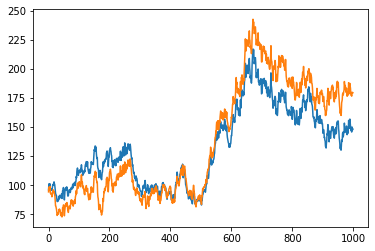

In [8]:
import matplotlib.pyplot as plt

pair = data.sel(simulation = 1, var_param = 0.5)
X1 = pair["X1"]
X2 = pair["X2"]

plt.plot(X1)
plt.plot(X2)
plt.show()

# Computing estimates

With a dataset of pairs of partially cointegrated time-series, we can estimate the model parameters for each pair using the "f_compute_estimates" function. Notice that we also pass a list of sample sizes. The function will automatically slice the dataset to keep the first n observations. In our case, our dataset containing 1000 observations will be sliced into smaller datasets with 100 and 1000 observations each. This results in two new data variables, estimates_sample_size_100 and estimates_sample_size_1000, each containing parameter estimates for the specified sample sizes across different simulations and parameter values. Thus, if we have s simulations, n sample sizes and p varying parameters, this function will return s x n x p sets of estimated parameters.

In [9]:
estimates = f_compute_estimates(dataset = data, sample_sizes = sample_sizes)
print(estimates)

<xarray.Dataset> Size: 3kB
Dimensions:                     (var_param: 3, simulation: 10, estimates: 5)
Coordinates:
  * var_param                   (var_param) float64 24B 0.5 1.0 1.5
  * simulation                  (simulation) int64 80B 0 1 2 3 4 5 6 7 8 9
  * estimates                   (estimates) <U7 140B 'beta' 'rho' ... 'lrt'
Data variables:
    estimates_sample_size_100   (var_param, simulation, estimates) float64 1kB ...
    estimates_sample_size_1000  (var_param, simulation, estimates) float64 1kB ...


We can now access the values of the estimated parameters for a specific sample size, simulation, and varying parameter value, as such:

In [10]:
estimates_100 = estimates["estimates_sample_size_100"].sel(simulation = 1, var_param = 0.5)
estimates_1000 = estimates["estimates_sample_size_1000"].sel(simulation = 1, var_param = 0.5)

print(f"100: {estimates_100.values}")
print(f"1000: {estimates_1000.values}")

# Remember: [alpha, beta, rho, sigma_m, sigma_r, sigma_x]

100: [ 0.96791341 -0.05285117  0.30665765  1.09441461 -0.25658802]
1000: [ 1.0192928   0.7328063   0.5471783   1.01769282 -0.2757325 ]


# Recreating results
## Tables 3-4
Now that we can simulate has many pairs as we want with various sample sizes and parameter values, we can start recreating the author's results. Reproducing tables 5 and 6 is time-consuming, as it requires estimating parameters on s x n x p = 10,000 x 3 x 5 pairs for each table. Thus, for this example, we will focus on the smaller dataset used above. 

Let's begin by computing the average value for each parameter across all simulations:

In [11]:
means = f_compute_means(estimates)
print(means)

<xarray.Dataset> Size: 404B
Dimensions:                     (var_param: 3, estimates: 5)
Coordinates:
  * var_param                   (var_param) float64 24B 0.5 1.0 1.5
  * estimates                   (estimates) <U7 140B 'beta' 'rho' ... 'lrt'
Data variables:
    estimates_sample_size_100   (var_param, estimates) float64 120B 0.9852 .....
    estimates_sample_size_1000  (var_param, estimates) float64 120B 0.9969 .....


We can do the same for the mean squarred errors. The function also requires the list of the true values of the non-varying parameters:

In [12]:
mse = f_compute_mse(estimates, params=params)
print(mse)

<xarray.Dataset> Size: 328B
Dimensions:                     (var_param: 3, estimates: 4)
Coordinates:
  * var_param                   (var_param) float64 24B 0.5 1.0 1.5
  * estimates                   (estimates) <U7 112B 'beta' 'rho' ... 'sigma_r'
Data variables:
    estimates_sample_size_100   (var_param, estimates) float64 96B 0.002179 ....
    estimates_sample_size_1000  (var_param, estimates) float64 96B 0.0001263 ...



Finally, we can use the f_create_estimates_table function with the mean and MSE datasets to recreate the table. The table will automatically be saved as an excel file called "estimates_table.xlsx" in the "Outputs" file. 

In [13]:
estimates_table = f_create_estimates_table(means, mse)
print(estimates_table.to_string())

    var_param estimates  mean_100  mean_1000  var_param estimates   mse_100  mse_1000
0         0.5      beta  0.985220   0.996895        0.5      beta  0.002179  0.000126
1         0.5       rho  0.451745   0.462186        0.5       rho  0.573780  0.496614
2         0.5   sigma_m  0.691299   0.357729        0.5   sigma_m  0.151872  0.060008
3         0.5   sigma_r  0.727618   1.050770        0.5   sigma_r  0.179896  0.005199
4         1.0      beta  0.970645   0.995546        1.0      beta  0.001759  0.000284
5         1.0       rho  0.831596   0.561333        1.0       rho  0.017488  0.402858
6         1.0   sigma_m  1.191508   0.868116        1.0   sigma_m  0.088866  0.164197
7         1.0   sigma_r  0.648947   1.028527        1.0   sigma_r  0.208232  0.060750
8         1.5      beta  0.963767   0.998571        1.5      beta  0.006604  0.000374
9         1.5       rho  0.861477   0.906709        1.5       rho  0.006559  0.002042
10        1.5   sigma_m  1.448434   1.471194        1.

## Table 5-6
We proceed in a similar manner for tables 5-6. We start by computing the powers for the given estimates, sample sizes, and quantiles. The "f_compute_power" function will automatically calculate the critical values under the null hypothesis: spread is a pure random walk. 

In [15]:
powers = f_compute_powers_lrt(estimates, sample_sizes, quantiles = [0.05]) # 5% percentile

powers_table = f_create_power_table(powers)
print(powers_table.to_string())

   var_param  quantile estimates  estimates_sample_size_100  estimates_sample_size_1000
0        0.5      0.05       lrt                        0.0                         0.1
1        1.0      0.05       lrt                        0.0                         0.7
2        1.5      0.05       lrt                        0.0                         0.9
